In [1]:
from src.model import PyTradeShifts
import os

In [2]:
print(os.getcwd())
# Go up one directory to get to the data folder
data_dir = os.path.join(os.path.dirname(os.getcwd()))
os.chdir(data_dir)
print(os.getcwd())

/home/florian/Documents/GitHub/pytradeshifts/scripts
/home/florian/Documents/GitHub/pytradeshifts


Loaded data for Wheat in Y2018.
Removed countries with trade below the 75th percentile.
Removed community {'Bhutan'} with only one country.
Removed community {'Niger'} with only one country.


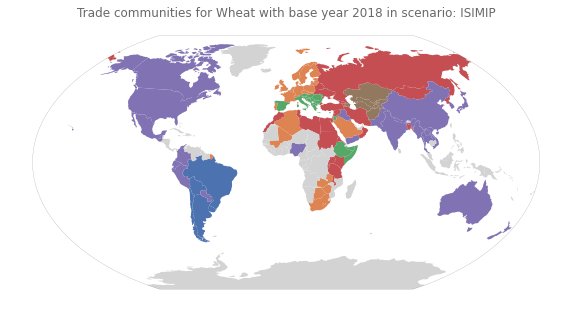

In [3]:
ISIMIP = PyTradeShifts(
    crop="Wheat",
    base_year=2018,
    scenario_file_name="ISIMIP_wheat_Hedlung.csv",
    scenario_name="ISIMIP",
)
